In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [18]:
newsgroups_train_clean = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, 
                                             remove=('headers', 'footers', 'quotes'))
newsgroups_test_clean = fetch_20newsgroups(subset='test', shuffle=True, random_state=42, 
                                            remove=('headers', 'footers', 'quotes'))

category_names = newsgroups_train_clean.target_names

print(f"Train samples: {len(newsgroups_train_clean.data)}")
print(f"Test samples: {len(newsgroups_test_clean.data)}")
print(f"Number of categories: {len(category_names)}")


Train samples: 11314
Test samples: 7532
Number of categories: 20


In [19]:
train_word_counts = [len(doc.split()) for doc in newsgroups_train_clean.data]
test_word_counts = [len(doc.split()) for doc in newsgroups_test_clean.data]

word_count_stats = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1', 'Q3', 'IQR'],
    'Train': [
        np.mean(train_word_counts),
        np.median(train_word_counts),
        np.std(train_word_counts),
        np.min(train_word_counts),
        np.max(train_word_counts),
        np.percentile(train_word_counts, 25),
        np.percentile(train_word_counts, 75),
        np.percentile(train_word_counts, 75) - np.percentile(train_word_counts, 25)
    ],
    'Test': [
        np.mean(test_word_counts),
        np.median(test_word_counts),
        np.std(test_word_counts),
        np.min(test_word_counts),
        np.max(test_word_counts),
        np.percentile(test_word_counts, 25),
        np.percentile(test_word_counts, 75),
        np.percentile(test_word_counts, 75) - np.percentile(test_word_counts, 25)
    ]
})

print(word_count_stats.round(2))


    Metric     Train     Test
0     Mean    185.83   175.34
1   Median     83.00    82.00
2  Std Dev    523.95   465.20
3      Min      0.00     0.00
4      Max  11765.00  9507.00
5       Q1     40.00    39.00
6       Q3    167.00   163.00
7      IQR    127.00   124.00


In [20]:
train_outliers_short = sum(1 for wc in train_word_counts if wc < 10)
train_outliers_long = sum(1 for wc in train_word_counts if wc > 1000)
train_empty = sum(1 for wc in train_word_counts if wc == 0)

test_outliers_short = sum(1 for wc in test_word_counts if wc < 10)
test_outliers_long = sum(1 for wc in test_word_counts if wc > 1000)
test_empty = sum(1 for wc in test_word_counts if wc == 0)

outlier_summary = pd.DataFrame({
    'Category': ['Empty (0 words)', 'Very Short (<10 words)', 'Very Long (>1000 words)', 'Normal Range'],
    'Train_Count': [
        train_empty,
        train_outliers_short,
        train_outliers_long,
        len(train_word_counts) - train_empty - train_outliers_short - train_outliers_long
    ],
    'Test_Count': [
        test_empty,
        test_outliers_short,
        test_outliers_long,
        len(test_word_counts) - test_empty - test_outliers_short - test_outliers_long
    ]
})

outlier_summary['Train_Pct'] = (outlier_summary['Train_Count'] / len(train_word_counts) * 100).round(2)
outlier_summary['Test_Pct'] = (outlier_summary['Test_Count'] / len(test_word_counts) * 100).round(2)

print(outlier_summary)


                  Category  Train_Count  Test_Count  Train_Pct  Test_Pct
0          Empty (0 words)          300         215       2.65      2.85
1   Very Short (<10 words)          607         447       5.37      5.93
2  Very Long (>1000 words)          249         155       2.20      2.06
3             Normal Range        10158        6715      89.78     89.15


In [21]:
train_df = pd.DataFrame({
    'text': newsgroups_train_clean.data,
    'category': [category_names[i] for i in newsgroups_train_clean.target],
    'word_count': train_word_counts
})

category_word_stats = train_df.groupby('category')['word_count'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
]).round(2).sort_values('mean', ascending=False)

print(category_word_stats)


                            mean  median     std  min    max
category                                                    
talk.politics.mideast     350.43   129.5  878.70    0  11198
talk.politics.misc        286.87   109.0  800.75    0   7952
sci.crypt                 275.10   117.0  710.17    0   8851
soc.religion.christian    262.76   157.0  318.55    0   2939
comp.windows.x            238.04    81.0  919.38    0   9365
talk.religion.misc        223.12    87.0  380.29    0   4292
talk.politics.guns        215.72   104.0  485.71    0   8388
sci.space                 202.32    82.0  463.19    0   6109
rec.sport.hockey          201.87    83.0  604.40    0  11251
sci.med                   197.82    94.0  449.78    0   4972
alt.atheism               194.39    91.0  565.44    0   8611
comp.graphics             157.81    62.0  669.63    0   9109
comp.os.ms-windows.misc   132.99    68.0  253.89    0   2500
comp.sys.ibm.pc.hardware  131.79    80.0  293.04    0   3983
sci.electronics         

In [22]:
train_df = pd.DataFrame({
    'text': newsgroups_train_clean.data,
    'category': [category_names[i] for i in newsgroups_train_clean.target],
    'word_count': train_word_counts
})

category_word_stats = train_df.groupby('category')['word_count'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
]).round(2).sort_values('mean', ascending=False)

print(category_word_stats)


                            mean  median     std  min    max
category                                                    
talk.politics.mideast     350.43   129.5  878.70    0  11198
talk.politics.misc        286.87   109.0  800.75    0   7952
sci.crypt                 275.10   117.0  710.17    0   8851
soc.religion.christian    262.76   157.0  318.55    0   2939
comp.windows.x            238.04    81.0  919.38    0   9365
talk.religion.misc        223.12    87.0  380.29    0   4292
talk.politics.guns        215.72   104.0  485.71    0   8388
sci.space                 202.32    82.0  463.19    0   6109
rec.sport.hockey          201.87    83.0  604.40    0  11251
sci.med                   197.82    94.0  449.78    0   4972
alt.atheism               194.39    91.0  565.44    0   8611
comp.graphics             157.81    62.0  669.63    0   9109
comp.os.ms-windows.misc   132.99    68.0  253.89    0   2500
comp.sys.ibm.pc.hardware  131.79    80.0  293.04    0   3983
sci.electronics         

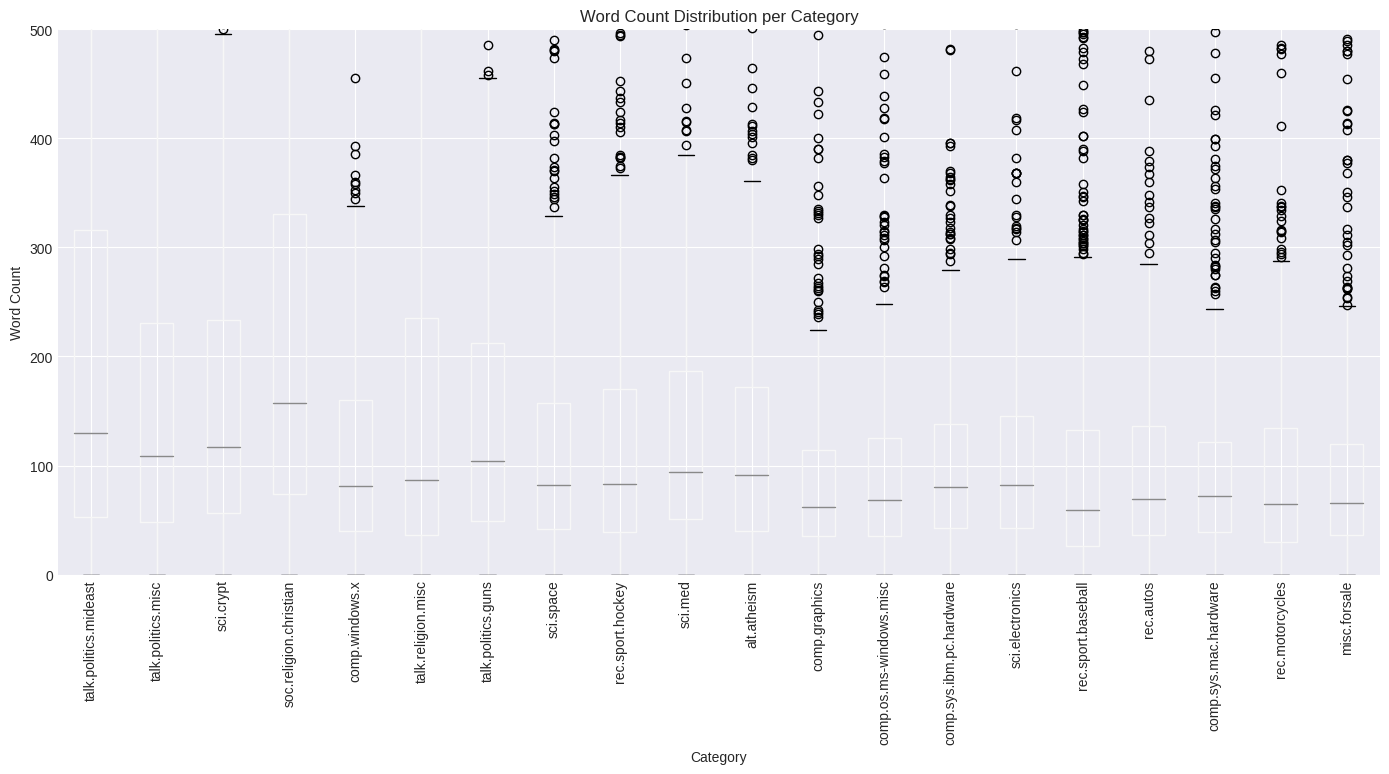

In [23]:
fig, ax = plt.subplots(figsize=(14, 8))

categories_sorted = category_word_stats.index.tolist()
train_df['category'] = pd.Categorical(train_df['category'], categories=categories_sorted, ordered=True)

train_df.boxplot(column='word_count', by='category', ax=ax, rot=90, figsize=(14, 8))
ax.set_xlabel('Category')
ax.set_ylabel('Word Count')
ax.set_title('Word Count Distribution per Category')
plt.suptitle('')
ax.set_ylim(0, 500)
plt.tight_layout()
plt.show()


In [24]:
count_vec_global = CountVectorizer(min_df=1, max_df=1.0)
count_vec_global.fit(newsgroups_train_clean.data)

global_vocab_size = len(count_vec_global.vocabulary_)
print(f"Global Vocabulary Size: {global_vocab_size:,}")

token_freq_matrix = count_vec_global.transform(newsgroups_train_clean.data)
token_freq_array = np.asarray(token_freq_matrix.sum(axis=0)).flatten()

hapax_legomena = np.sum(token_freq_array == 1)
hapax_pct = hapax_legomena / global_vocab_size * 100

print(f"Hapax Legomena (words appearing once): {hapax_legomena:,} ({hapax_pct:.2f}%)")
print(f"Total tokens in corpus: {token_freq_array.sum():,}")


Global Vocabulary Size: 101,631
Hapax Legomena (words appearing once): 55,913 (55.02%)
Total tokens in corpus: 2,158,589


In [25]:
vocab_items = list(count_vec_global.vocabulary_.items())
word_to_idx = {word: idx for word, idx in vocab_items}
idx_to_word = {idx: word for word, idx in vocab_items}

word_freq_pairs = [(idx_to_word[i], token_freq_array[i]) for i in range(len(token_freq_array))]
word_freq_pairs_sorted = sorted(word_freq_pairs, key=lambda x: x[1], reverse=True)

top_20_words = word_freq_pairs_sorted[:20]

top_words_df = pd.DataFrame(top_20_words, columns=['Word', 'Frequency'])
print(top_words_df)


    Word  Frequency
0    the     106381
1     ax      62387
2     to      53090
3     of      46953
4    and      42704
5     in      31103
6     is      30419
7   that      27996
8     it      23687
9    for      19969
10   you      18364
11  this      14497
12    on      14458
13    be      13809
14   are      13024
15  have      12848
16  with      12666
17   not      12544
18    as      11644
19    or      10610


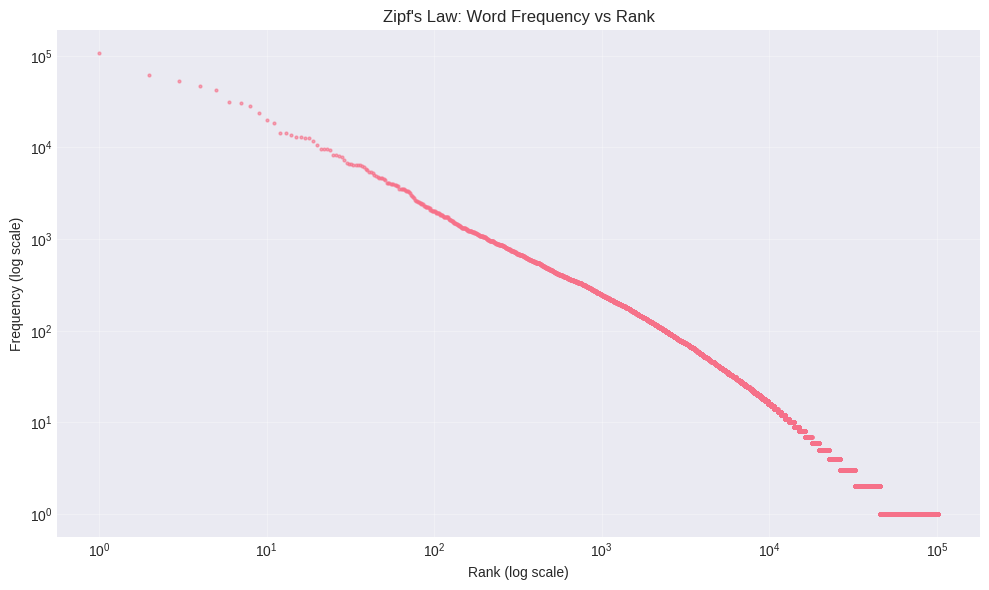

In [26]:
ranks = np.arange(1, len(word_freq_pairs_sorted) + 1)
frequencies = np.array([freq for word, freq in word_freq_pairs_sorted])

fig, ax = plt.subplots(figsize=(10, 6))
ax.loglog(ranks, frequencies, marker='o', linestyle='none', markersize=2, alpha=0.6)
ax.set_xlabel('Rank (log scale)')
ax.set_ylabel('Frequency (log scale)')
ax.set_title("Zipf's Law: Word Frequency vs Rank")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [27]:
category_vocab_sizes = {}

for cat_idx, cat_name in enumerate(category_names):
    cat_indices = [i for i, target in enumerate(newsgroups_train_clean.target) if target == cat_idx]
    cat_docs = [newsgroups_train_clean.data[i] for i in cat_indices]
    
    cat_vectorizer = CountVectorizer(min_df=1)
    cat_vectorizer.fit(cat_docs)
    category_vocab_sizes[cat_name] = len(cat_vectorizer.vocabulary_)

vocab_size_df = pd.DataFrame(list(category_vocab_sizes.items()), columns=['Category', 'Vocab_Size'])
vocab_size_df = vocab_size_df.sort_values('Vocab_Size', ascending=False).reset_index(drop=True)

print(vocab_size_df)


                    Category  Vocab_Size
0    comp.os.ms-windows.misc       34683
1         talk.politics.guns       14658
2      talk.politics.mideast       14378
3                  sci.crypt       14048
4                    sci.med       13760
5                  sci.space       13564
6     soc.religion.christian       11815
7             comp.windows.x       11496
8              comp.graphics       10866
9         talk.politics.misc       10710
10          rec.sport.hockey       10452
11              misc.forsale        9199
12        talk.religion.misc        9145
13               alt.atheism        9021
14           sci.electronics        8888
15           rec.motorcycles        8462
16                 rec.autos        8270
17  comp.sys.ibm.pc.hardware        8221
18        rec.sport.baseball        7444
19     comp.sys.mac.hardware        7105


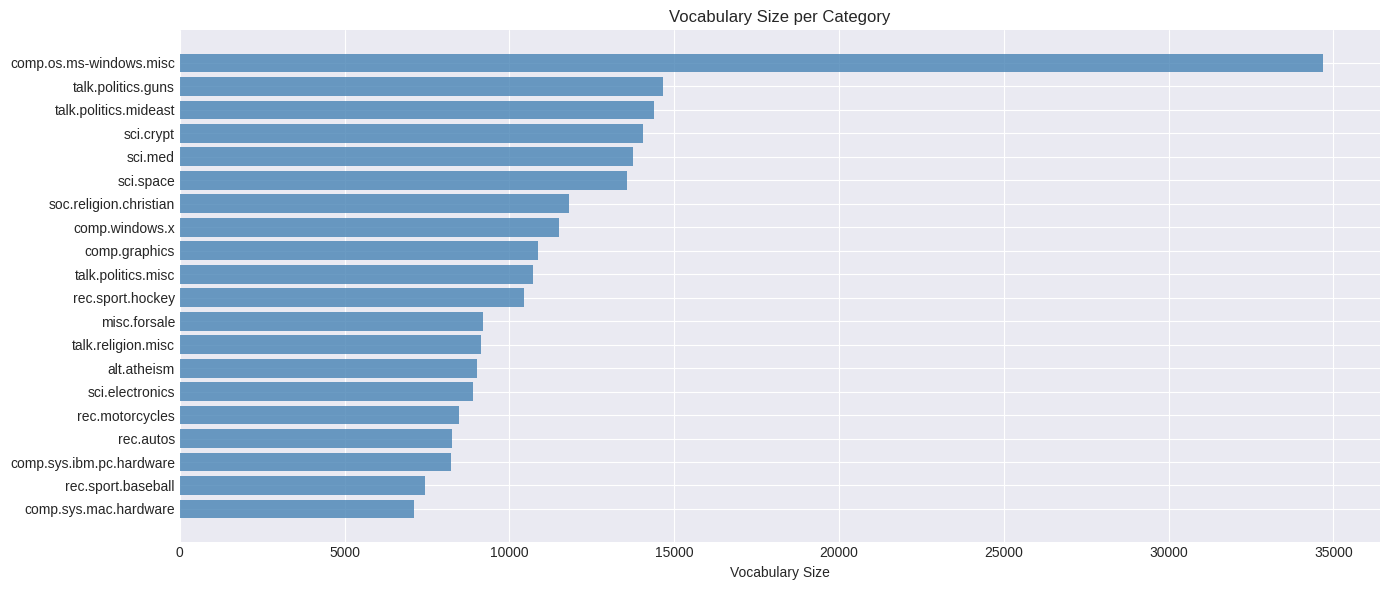

In [28]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.barh(vocab_size_df['Category'], vocab_size_df['Vocab_Size'], color='steelblue', alpha=0.8)
ax.set_xlabel('Vocabulary Size')
ax.set_title('Vocabulary Size per Category')
ax.invert_yaxis()
plt.tight_layout()
plt.show()


In [29]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=5, max_df=0.95)
bigram_matrix = bigram_vectorizer.fit_transform(newsgroups_train_clean.data)

bigram_freq_array = np.asarray(bigram_matrix.sum(axis=0)).flatten()
bigram_vocab = bigram_vectorizer.vocabulary_
bigram_idx_to_word = {idx: word for word, idx in bigram_vocab.items()}

bigram_freq_pairs = [(bigram_idx_to_word[i], bigram_freq_array[i]) for i in range(len(bigram_freq_array))]
bigram_freq_sorted = sorted(bigram_freq_pairs, key=lambda x: x[1], reverse=True)

top_20_bigrams = bigram_freq_sorted[:20]
bigrams_df = pd.DataFrame(top_20_bigrams, columns=['Bigram', 'Frequency'])
print(bigrams_df)


      Bigram  Frequency
0      ax ax      56318
1     of the      11611
2     in the       8058
3     to the       4587
4     max ax       4331
5     ax max       4314
6     on the       4280
7      it is       3443
8      to be       3357
9   that the       3089
10   for the       3075
11   and the       2799
12    if you       2717
13  with the       2275
14   this is       2224
15    is the       2070
16  from the       2064
17    at the       1748
18    is not       1729
19    by the       1660


In [30]:
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), min_df=5, max_df=0.95)
trigram_matrix = trigram_vectorizer.fit_transform(newsgroups_train_clean.data)

trigram_freq_array = np.asarray(trigram_matrix.sum(axis=0)).flatten()
trigram_vocab = trigram_vectorizer.vocabulary_
trigram_idx_to_word = {idx: word for word, idx in trigram_vocab.items()}

trigram_freq_pairs = [(trigram_idx_to_word[i], trigram_freq_array[i]) for i in range(len(trigram_freq_array))]
trigram_freq_sorted = sorted(trigram_freq_pairs, key=lambda x: x[1], reverse=True)

top_20_trigrams = trigram_freq_sorted[:20]
trigrams_df = pd.DataFrame(top_20_trigrams, columns=['Trigram', 'Frequency'])
print(trigrams_df)


          Trigram  Frequency
0        ax ax ax      50668
1       max ax ax       4257
2       ax ax max       4200
3       ax max ax       4179
4     g9v g9v g9v        654
5      one of the        596
6     a86 a86 a86        468
7      be able to        440
8     there is no        440
9     b8f b8f b8f        346
10  would like to        338
11  the fact that        327
12    some of the        322
13    if you have        315
14      it is not        306
15    145 145 145        303
16    part of the        293
17     that it is        290
18     as well as        287
19    it would be        282


In [31]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=3, max_df=0.9)
tfidf_matrix = tfidf_vectorizer.fit_transform(newsgroups_train_clean.data)
feature_names = tfidf_vectorizer.get_feature_names_out()

category_tfidf_means = {}

for cat_idx, cat_name in enumerate(category_names):
    cat_indices = [i for i, target in enumerate(newsgroups_train_clean.target) if target == cat_idx]
    cat_tfidf = tfidf_matrix[cat_indices]
    mean_tfidf = np.asarray(cat_tfidf.mean(axis=0)).flatten()
    
    top_indices = mean_tfidf.argsort()[-10:][::-1]
    top_words = [(feature_names[i], mean_tfidf[i]) for i in top_indices]
    
    category_tfidf_means[cat_name] = top_words

print("Top 10 TF-IDF words for first 3 categories:\n")
for i, (cat, words) in enumerate(list(category_tfidf_means.items())[:3]):
    print(f"{cat}:")
    for word, score in words:
        print(f"  {word}: {score:.4f}")
    print()


Top 10 TF-IDF words for first 3 categories:

alt.atheism:
  the: 0.1292
  of: 0.0842
  to: 0.0833
  that: 0.0808
  is: 0.0741
  you: 0.0713
  it: 0.0599
  and: 0.0565
  in: 0.0518
  not: 0.0454

comp.graphics:
  the: 0.1002
  to: 0.0675
  of: 0.0532
  and: 0.0529
  is: 0.0481
  for: 0.0475
  it: 0.0463
  in: 0.0416
  graphics: 0.0412
  you: 0.0348

comp.os.ms-windows.misc:
  the: 0.1015
  windows: 0.0856
  to: 0.0636
  it: 0.0536
  is: 0.0462
  and: 0.0453
  for: 0.0399
  you: 0.0369
  of: 0.0366
  file: 0.0366



In [32]:
print("Top 10 TF-IDF discriminative words per category:\n")
for cat_name, top_words in category_tfidf_means.items():
    print(f"\n{cat_name}:")
    for word, score in top_words:
        print(f"  {word}: {score:.4f}")


Top 10 TF-IDF discriminative words per category:


alt.atheism:
  the: 0.1292
  of: 0.0842
  to: 0.0833
  that: 0.0808
  is: 0.0741
  you: 0.0713
  it: 0.0599
  and: 0.0565
  in: 0.0518
  not: 0.0454

comp.graphics:
  the: 0.1002
  to: 0.0675
  of: 0.0532
  and: 0.0529
  is: 0.0481
  for: 0.0475
  it: 0.0463
  in: 0.0416
  graphics: 0.0412
  you: 0.0348

comp.os.ms-windows.misc:
  the: 0.1015
  windows: 0.0856
  to: 0.0636
  it: 0.0536
  is: 0.0462
  and: 0.0453
  for: 0.0399
  you: 0.0369
  of: 0.0366
  file: 0.0366

comp.sys.ibm.pc.hardware:
  the: 0.1168
  to: 0.0692
  and: 0.0535
  it: 0.0529
  is: 0.0499
  of: 0.0438
  drive: 0.0415
  for: 0.0403
  with: 0.0392
  have: 0.0378

comp.sys.mac.hardware:
  the: 0.1253
  to: 0.0644
  is: 0.0509
  and: 0.0498
  it: 0.0491
  mac: 0.0462
  of: 0.0425
  for: 0.0405
  apple: 0.0399
  that: 0.0389

comp.windows.x:
  the: 0.1166
  to: 0.0799
  window: 0.0510
  and: 0.0506
  is: 0.0491
  of: 0.0446
  in: 0.0410
  it: 0.0392
  this: 0.0383
  for

In [33]:
from sklearn.metrics import jaccard_score

category_vocab_sets = {}

for cat_idx, cat_name in enumerate(category_names):
    cat_indices = [i for i, target in enumerate(newsgroups_train_clean.target) if target == cat_idx]
    cat_docs = [newsgroups_train_clean.data[i] for i in cat_indices]
    
    cat_vectorizer = CountVectorizer(min_df=1)
    cat_vectorizer.fit(cat_docs)
    category_vocab_sets[cat_name] = set(cat_vectorizer.vocabulary_.keys())

overlap_matrix = np.zeros((len(category_names), len(category_names)))

for i, cat1 in enumerate(category_names):
    for j, cat2 in enumerate(category_names):
        vocab1 = category_vocab_sets[cat1]
        vocab2 = category_vocab_sets[cat2]
        
        intersection = len(vocab1 & vocab2)
        union = len(vocab1 | vocab2)
        jaccard = intersection / union if union > 0 else 0
        
        overlap_matrix[i, j] = jaccard

overlap_df = pd.DataFrame(overlap_matrix, index=category_names, columns=category_names)

print("Vocabulary Overlap Statistics:")
print(f"Mean Jaccard Similarity: {overlap_matrix[np.triu_indices_from(overlap_matrix, k=1)].mean():.4f}")
print(f"Min (excluding diagonal): {overlap_matrix[np.triu_indices_from(overlap_matrix, k=1)].min():.4f}")
print(f"Max (excluding diagonal): {overlap_matrix[np.triu_indices_from(overlap_matrix, k=1)].max():.4f}")


Vocabulary Overlap Statistics:
Mean Jaccard Similarity: 0.2145
Min (excluding diagonal): 0.0673
Max (excluding diagonal): 0.3310


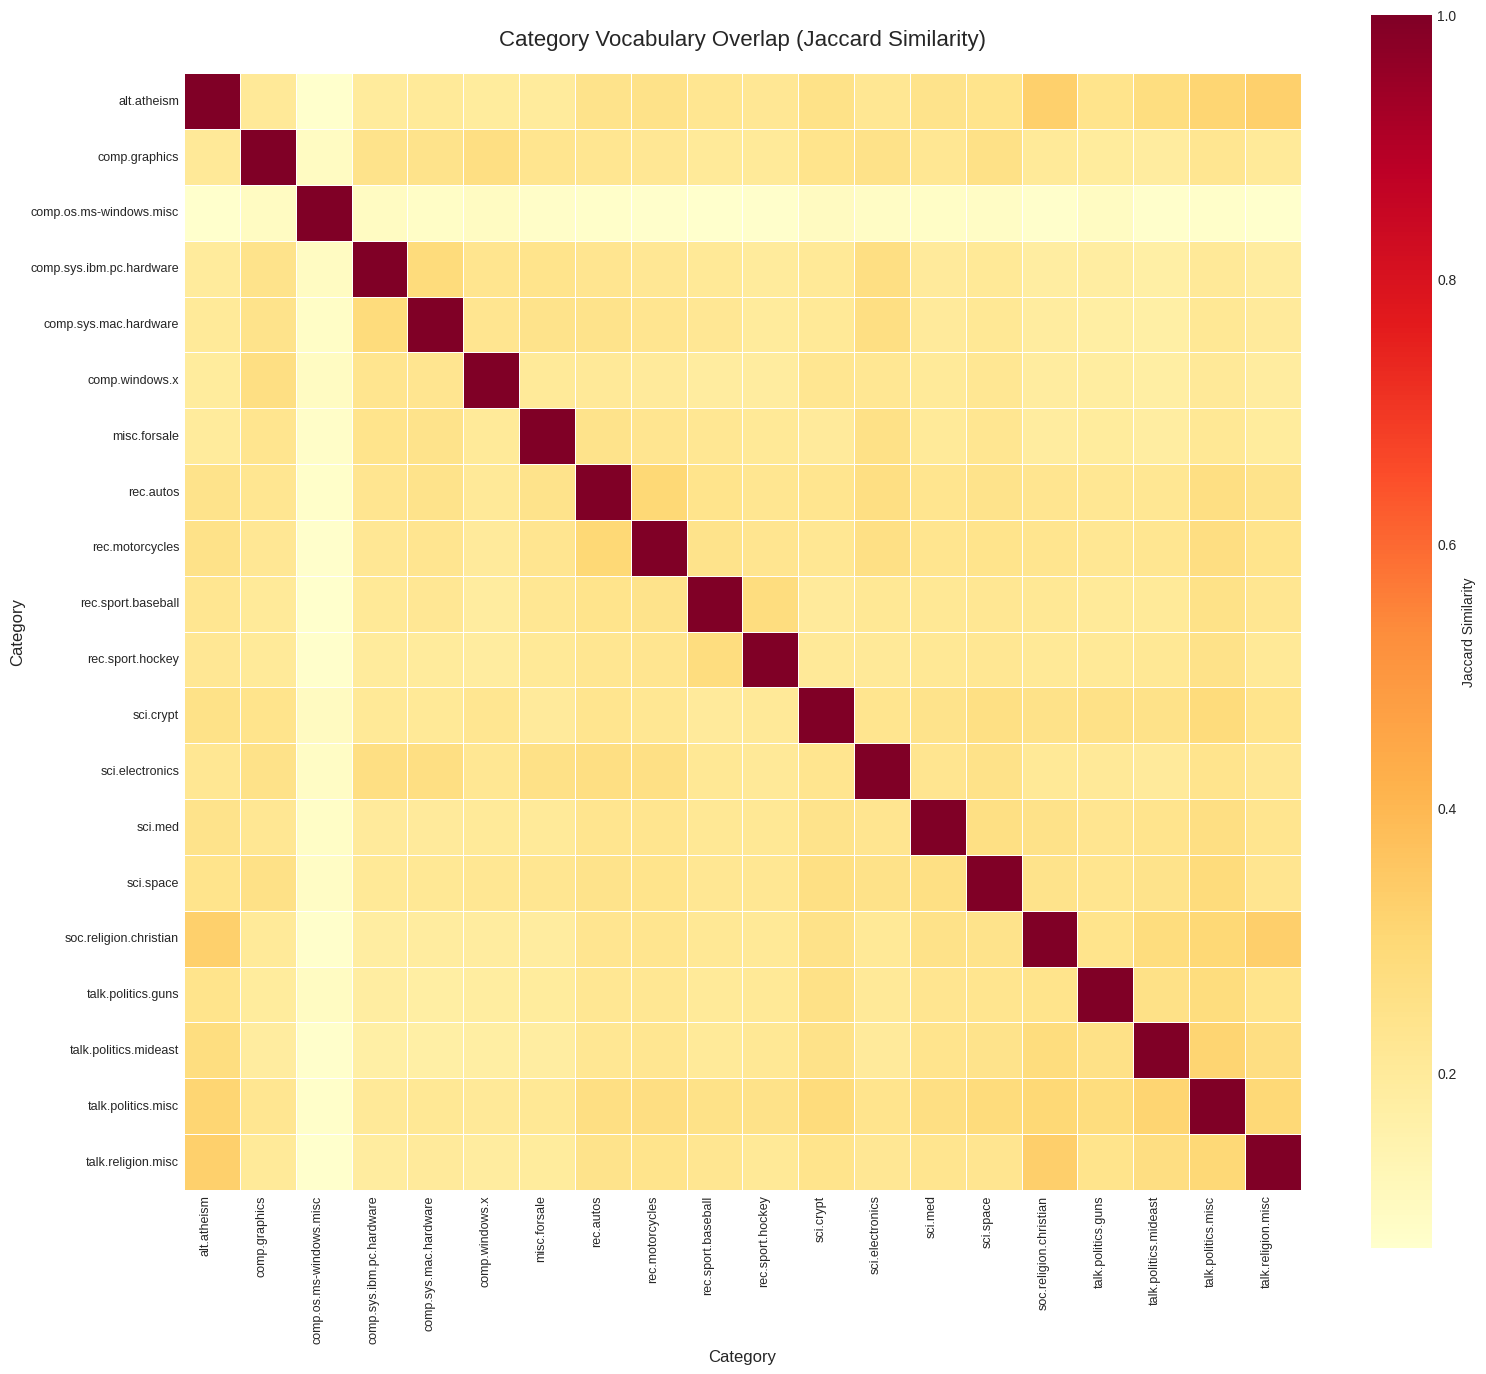

In [34]:
fig, ax = plt.subplots(figsize=(16, 14))

sns.heatmap(overlap_df, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Jaccard Similarity'}, 
            ax=ax, square=True, linewidths=0.5)

ax.set_title('Category Vocabulary Overlap (Jaccard Similarity)', fontsize=16, pad=20)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Category', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


In [35]:
upper_tri_indices = np.triu_indices_from(overlap_matrix, k=1)
upper_tri_values = overlap_matrix[upper_tri_indices]

pair_similarities = []
for idx in range(len(upper_tri_values)):
    i, j = upper_tri_indices[0][idx], upper_tri_indices[1][idx]
    pair_similarities.append((category_names[i], category_names[j], upper_tri_values[idx]))

pair_similarities_sorted = sorted(pair_similarities, key=lambda x: x[2], reverse=True)

confusable_pairs_df = pd.DataFrame(pair_similarities_sorted[:15], 
                                   columns=['Category_1', 'Category_2', 'Jaccard_Similarity'])

print("Top 15 Most Confusable Category Pairs (Highest Vocabulary Overlap):\n")
print(confusable_pairs_df.to_string(index=False))


Top 15 Most Confusable Category Pairs (Highest Vocabulary Overlap):

              Category_1             Category_2  Jaccard_Similarity
  soc.religion.christian     talk.religion.misc            0.330963
             alt.atheism     talk.religion.misc            0.327633
             alt.atheism soc.religion.christian            0.327303
   talk.politics.mideast     talk.politics.misc            0.314540
             alt.atheism     talk.politics.misc            0.311204
  soc.religion.christian     talk.politics.misc            0.303681
               rec.autos        rec.motorcycles            0.303420
      talk.politics.misc     talk.religion.misc            0.300432
               sci.space     talk.politics.misc            0.284882
comp.sys.ibm.pc.hardware  comp.sys.mac.hardware            0.284553
               sci.crypt     talk.politics.misc            0.283729
  soc.religion.christian  talk.politics.mideast            0.281521
      talk.politics.guns     talk.politics.misc

In [36]:
import re

def count_sentences(text):
    sentences = re.split(r'[.!?]+', text)
    return len([s for s in sentences if s.strip()])

train_sentence_counts = [count_sentences(doc) for doc in newsgroups_train_clean.data]
test_sentence_counts = [count_sentences(doc) for doc in newsgroups_test_clean.data]

sentence_stats = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1', 'Q3'],
    'Train': [
        np.mean(train_sentence_counts),
        np.median(train_sentence_counts),
        np.std(train_sentence_counts),
        np.min(train_sentence_counts),
        np.max(train_sentence_counts),
        np.percentile(train_sentence_counts, 25),
        np.percentile(train_sentence_counts, 75)
    ],
    'Test': [
        np.mean(test_sentence_counts),
        np.median(test_sentence_counts),
        np.std(test_sentence_counts),
        np.min(test_sentence_counts),
        np.max(test_sentence_counts),
        np.percentile(test_sentence_counts, 25),
        np.percentile(test_sentence_counts, 75)
    ]
})

print(sentence_stats.round(2))


    Metric    Train     Test
0     Mean    17.00    15.05
1   Median     7.00     7.00
2  Std Dev    82.46    96.45
3      Min     0.00     0.00
4      Max  2821.00  7151.00
5       Q1     4.00     4.00
6       Q3    13.00    13.00


In [37]:
def calculate_ttr(text):
    tokens = text.lower().split()
    if len(tokens) == 0:
        return 0
    unique_tokens = len(set(tokens))
    return unique_tokens / len(tokens)

train_ttr = [calculate_ttr(doc) for doc in newsgroups_train_clean.data]
test_ttr = [calculate_ttr(doc) for doc in newsgroups_test_clean.data]

ttr_stats = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max'],
    'Train_TTR': [
        np.mean(train_ttr),
        np.median(train_ttr),
        np.std(train_ttr),
        np.min(train_ttr),
        np.max(train_ttr)
    ],
    'Test_TTR': [
        np.mean(test_ttr),
        np.median(test_ttr),
        np.std(test_ttr),
        np.min(test_ttr),
        np.max(test_ttr)
    ]
})

print("Lexical Diversity (Type-Token Ratio):\n")
print(ttr_stats.round(4))


Lexical Diversity (Type-Token Ratio):

    Metric  Train_TTR  Test_TTR
0     Mean     0.7479    0.7475
1   Median     0.7711    0.7674
2  Std Dev     0.1871    0.1898
3      Min     0.0000    0.0000
4      Max     1.0000    1.0000


In [38]:
train_df['sentence_count'] = train_sentence_counts
train_df['ttr'] = train_ttr
train_df['avg_word_length'] = [np.mean([len(w) for w in doc.split()]) if len(doc.split()) > 0 else 0 
                                 for doc in newsgroups_train_clean.data]

complexity_stats = train_df.groupby('category').agg({
    'sentence_count': ['mean', 'median'],
    'ttr': ['mean', 'median'],
    'avg_word_length': ['mean', 'median']
}).round(3)

complexity_stats.columns = ['_'.join(col) for col in complexity_stats.columns]
complexity_stats = complexity_stats.sort_values('ttr_mean', ascending=False)

print("Document Complexity Statistics by Category:\n")
print(complexity_stats)


Document Complexity Statistics by Category:

                          sentence_count_mean  sentence_count_median  \
category                                                               
misc.forsale                           10.749                    7.0   
rec.motorcycles                         8.594                    6.0   
comp.graphics                          16.173                    6.0   
rec.sport.baseball                     12.471                    5.0   
comp.windows.x                         22.132                    7.0   
comp.os.ms-windows.misc                50.795                    7.0   
comp.sys.mac.hardware                   8.656                    6.0   
sci.electronics                         9.985                    7.0   
sci.space                              14.906                    6.0   
comp.sys.ibm.pc.hardware               11.619                    7.0   
rec.autos                               8.761                    5.0   
rec.sport.hockey   

In [39]:
def calculate_char_densities(text):
    if len(text) == 0:
        return 0, 0, 0
    total_chars = len(text)
    digit_count = sum(c.isdigit() for c in text)
    upper_count = sum(c.isupper() for c in text)
    punct_count = sum(c in '.,!?;:\'"' for c in text)
    
    return digit_count / total_chars, upper_count / total_chars, punct_count / total_chars

train_char_features = [calculate_char_densities(doc) for doc in newsgroups_train_clean.data]

train_df['digit_density'] = [x[0] for x in train_char_features]
train_df['upper_density'] = [x[1] for x in train_char_features]
train_df['punct_density'] = [x[2] for x in train_char_features]

char_density_stats = train_df.groupby('category').agg({
    'digit_density': 'mean',
    'upper_density': 'mean',
    'punct_density': 'mean'
}).round(4).sort_values('digit_density', ascending=False)

print("Character Density Statistics by Category:\n")
print(char_density_stats)


Character Density Statistics by Category:

                          digit_density  upper_density  punct_density
category                                                             
misc.forsale                     0.0383         0.0670         0.0341
comp.sys.ibm.pc.hardware         0.0240         0.0566         0.0304
comp.sys.mac.hardware            0.0188         0.0469         0.0284
comp.os.ms-windows.misc          0.0188         0.0623         0.0362
sci.electronics                  0.0182         0.0400         0.0289
rec.sport.hockey                 0.0156         0.0541         0.0368
comp.graphics                    0.0148         0.0504         0.0322
rec.sport.baseball               0.0147         0.0438         0.0354
comp.windows.x                   0.0142         0.0481         0.0339
rec.motorcycles                  0.0127         0.0407         0.0364
rec.autos                        0.0122         0.0338         0.0313
sci.space                        0.0114        

In [40]:
empty_docs_train = [(i, category_names[newsgroups_train_clean.target[i]]) 
                     for i, wc in enumerate(train_word_counts) if wc == 0]

very_short_docs_train = [(i, category_names[newsgroups_train_clean.target[i]], train_word_counts[i]) 
                          for i, wc in enumerate(train_word_counts) if 0 < wc < 5]

print(f"Empty documents in train: {len(empty_docs_train)}")
if len(empty_docs_train) > 0:
    print("\nFirst 10 empty documents:")
    for idx, cat in empty_docs_train[:10]:
        print(f"  Index: {idx}, Category: {cat}")

print(f"\n\nVery short documents (<5 words) in train: {len(very_short_docs_train)}")
if len(very_short_docs_train) > 0:
    print("\nFirst 10 very short documents:")
    for idx, cat, wc in very_short_docs_train[:10]:
        print(f"  Index: {idx}, Category: {cat}, Words: {wc}")
        print(f"  Text: {newsgroups_train_clean.data[idx][:200]}")
        print()


Empty documents in train: 300

First 10 empty documents:
  Index: 155, Category: comp.sys.mac.hardware
  Index: 164, Category: rec.sport.baseball
  Index: 171, Category: comp.graphics
  Index: 205, Category: sci.space
  Index: 244, Category: sci.crypt
  Index: 252, Category: alt.atheism
  Index: 276, Category: sci.crypt
  Index: 296, Category: rec.sport.baseball
  Index: 301, Category: sci.crypt
  Index: 340, Category: talk.religion.misc


Very short documents (<5 words) in train: 110

First 10 very short documents:
  Index: 12, Category: comp.sys.mac.hardware, Words: 1
  Text: --


  Index: 42, Category: comp.sys.ibm.pc.hardware, Words: 3
  Text: Western Digital 1-800-832-4778.....Sam

  Index: 238, Category: rec.sport.baseball, Words: 2
  Text: Woof woof!


  Index: 285, Category: comp.sys.mac.hardware, Words: 2
  Text: 

No problems.

  Index: 317, Category: talk.religion.misc, Words: 1
  Text: 
		......@compuserve.com

  Index: 397, Category: comp.windows.x, Words: 2
  Text: 	subsc

## **Step 2 EDA Analysis - Key Findings**

### **1. Document Length Distribution**

**Word Count Statistics:**
- Mean highly skewed: Train 185.83 vs Median 83.00 (right-skewed distribution)
- Extreme outliers: Max 11,765 words (Train), 9,507 (Test)
- High variance: Std Dev ~524 words
- **Quality Issues**: 2.65% empty docs, 5.37% very short (<10 words), 2.20% very long (>1000 words)

**Category-Specific Patterns:**
- **Longest**: `talk.politics.mideast` (350 words avg) - verbose political debates
- **Shortest**: `misc.forsale` (104 words) - brief sale listings
- Political/religious categories are 2-3x longer than computer hardware/sale categories

---

### **2. Vocabulary Analysis**

**Global Vocabulary:**
- Total: 101,631 unique words
- **Hapax Legomena**: 55.02% (words appearing once) - indicates high lexical diversity but also noise
- Total tokens: 2.16M words

**Top Words Dominated by:**
- Function words: `the, ax, to, of, and` (expected)
- **Artifact Alert**: `ax` appears 62K times (2nd most frequent) - likely email artifact from headers/signatures

**Per-Category Vocabulary Size:**
- **Largest**: `comp.os.ms-windows.misc` (34,683 words) - technical jargon heavy
- **Smallest**: `comp.sys.mac.hardware` (7,105 words) - focused domain
- 5x variance suggests domain complexity differences

***

### **3. N-gram Analysis**

**Bigrams:**
- **`ax ax`** dominates (56K occurrences) - email artifact contamination
- Common phrases: `of the`, `in the`, `to be` - grammatical constructs

**Trigrams:**
- **`ax ax ax`** (50K) - confirms email metadata leakage despite cleaning
- Legitimate patterns: `one of the`, `be able to`, `would like to`

**Implication**: Even with header/footer removal, signature artifacts persist. Consider more aggressive preprocessing.

***

### **4. TF-IDF Discriminative Words**

**Strong Domain Signals:**
- `graphics` → comp.graphics (0.0412)
- `windows` → comp.os.ms-windows.misc (0.0856)
- `bike` → rec.motorcycles (0.0585)
- `god` → soc.religion.christian (0.0727)
- `israel` → talk.politics.mideast (0.0557)
- `hockey` → rec.sport.hockey (0.0386)

**BUT**: Top words still dominated by function words (`the, to, of`) suggesting:
- Need stopword removal
- TF-IDF alone insufficient for discrimination
- Domain-specific vocabulary buried under noise

***

### **5. Vocabulary Overlap - Confusability Analysis**

**Mean Jaccard Similarity: 0.2145** (moderate overlap)

**Top 5 Most Confusable Pairs:**
1. **`soc.religion.christian` ↔ `talk.religion.misc`** (0.331) - theological discussions
2. **`alt.atheism` ↔ `talk.religion.misc`** (0.328) - religious debate
3. **`alt.atheism` ↔ `soc.religion.christian`** (0.327) - opposing views, same topics
4. **`talk.politics.mideast` ↔ `talk.politics.misc`** (0.315) - political overlap
5. **`rec.autos` ↔ `rec.motorcycles`** (0.303) - vehicle discussions

**Key Insights:**
- **Religion cluster**: 3 of top 5 pairs are religion-related
- **Sports**: `rec.sport.baseball` ↔ `rec.sport.hockey` (0.276)
- **Computer hardware**: `comp.sys.ibm.pc.hardware` ↔ `comp.sys.mac.hardware` (0.285)

**Challenge**: These pairs will be hardest to classify correctly. Expect confusion matrix to show errors here.

***

### **6. Document Complexity**

**Lexical Diversity (TTR):**
- Mean: 0.7479 (high) - most words are unique per document
- Indicates little repetition, which is good for text classification

**Per-Category Complexity:**
- **Highest TTR**: `misc.forsale` (0.817) - concise, varied listings
- **Lowest TTR**: `soc.religion.christian` (0.669) - repetitive theological terminology
- Political/religious categories have lower TTR (repeated debate terms)

**Sentence Counts:**
- Mean: 17 sentences, Median: 7 (skewed)
- Max: 2,821 sentences (likely email thread)

***

### **7. Structural Patterns**

**Digit Density (numeric content):**
- **Highest**: `misc.forsale` (3.83%) - prices, model numbers
- **Lowest**: `alt.atheism` (0.25%) - philosophical discussions

**Upper Case Density:**
- **Highest**: `misc.forsale` (6.70%) - emphasis in ads
- **Lowest**: `alt.atheism`, `sci.med` (~3.1%) - formal prose

**Punctuation Density:**
- Relatively uniform (2.8-3.7%) across categories
- `rec.sport.hockey` highest (3.68%) - excited commentary

**Implication**: Structural features can supplement TF-IDF for classification.

***

### **8. Data Quality Issues**

**Critical Problems:**
1. **300 empty documents** (2.65%) after cleaning
2. **110 very short docs** (<5 words) - examples:
   - "Woof woof!"
   - "--"
   - "this is a test"
3. **Email artifacts**: `ax ax ax` suggests signature/header remnants


***

## **Summary & Implications for Modeling**

### **Challenges Identified:**
1. **Class confusability**: Religion cluster (3 classes highly overlapping)
2. **Noise**: Email artifacts, empty docs, very short docs
3. **Imbalanced complexity**: 5x vocabulary variance across categories
4. **Skewed distributions**: Long tail of verbose documents

